<h3>Part 1. Real State Prices</h3>

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline

In [286]:
houses_col=['Transction unique identifier','Price','Date of Transfer','Postcode','Property Type','old/new','Duration','PAON','SAON','Street','Locality','Town/City','District','Country','PPDCategory Type','Record Status-monthly file only']
houses = pd.read_csv('houses.csv', header=-1, names=houses_col)

In [251]:
houses.head()

,Transction unique identifier,Price,Date of Transfer,Postcode,Property Type,old/new,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPDCategory Type,Record Status-monthly file only
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [252]:
houses.Price.describe()

count    1.000000e+05
mean     1.743868e+05
std      3.514634e+05
min      1.500000e+02
25%      7.400000e+04
50%      1.290000e+05
75%      2.070000e+05
max      4.846572e+07
Name: Price, dtype: float64

In [253]:
houses.Price.median()

129000.0

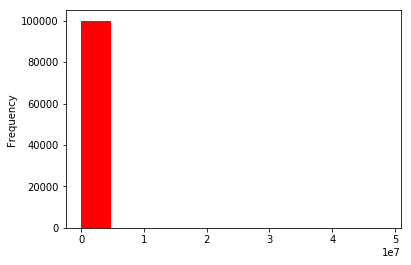

In [254]:
houses.Price.plot(kind='hist',rwidth=1,color='r')

<p>The above histogram looks ugly because we donot get much info about the shape of histogram and also it donot tells us how the prices varies </p>
<p>To make it more informative, we can draw different plots considering the only subset of price i.e. to break the whole data into parts</p> 

In [273]:
houses.Price.sort_values()

37996         150
37806         192
29008         300
52037         325
53736         450
27490         501
55122         800
51937        1350
15266        1600
31745        2000
65088        2000
65274        2000
86616        2010
57679        3000
50046        3000
17599        3000
702          3000
5221         3000
92103        3250
11681        3500
18539        3500
29977        3900
11346        4000
62142        4000
64538        4000
36708        4500
74649        4500
58413        5000
69228        5000
20719        5000
           ...   
21702     5600000
74301     5700000
25532     5725000
86132     5800000
31482     6050000
83976     6250000
39050     6600000
57171     6700000
45362     6750000
41300     6975980
34121     7392000
4608      7500000
79364     7505000
60604     8000000
38513     8281588
50021     9250000
31043     9650000
43598    10000000
55432    11626000
34638    13285244
66805    15193950
31298    16100000
85887    18500000
87158    19520316
85212    2

(array([0., 0., 1., 0., 0., 0., 1., 0., 0., 2., 0., 1., 1., 0., 1.]),
 array([130, 140, 150, 160, 170, 180, 190, 200, 210, 300, 340, 400, 500,
        600, 700, 900]),
 <a list of 15 Patch objects>)

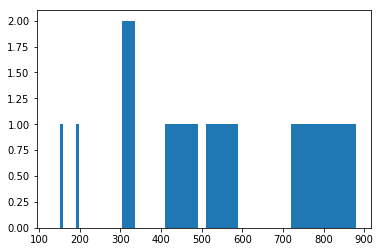

In [274]:
x = houses['Price']
bins=[130,140,150,160,170,180,190,200,210,300,340,400,500,600,700,900]
plt.hist(x,bins,histtype='bar',rwidth=0.8)

(array([ 1.,  1.,  4.,  9.,  3.,  2., 24.]),
 array([1300, 1500, 2000, 3000, 4000, 4500, 5000, 7000]),
 <a list of 7 Patch objects>)

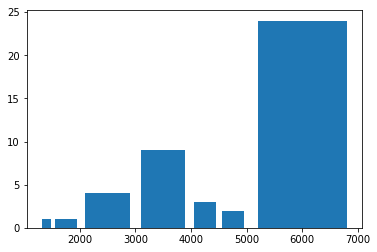

In [276]:
x = houses['Price']
bins=[1300,1500,2000,3000,4000,4500,5000,7000]
plt.hist(x,bins,histtype='bar',rwidth=0.8)

<p>Like the above two histograms we have the make so many histograms to analyse the plot</p>

The histogram is ugly because the  we donot get get any useful info from the histogrma.

In [93]:
x=houses[houses.Price & houses['Town/City'].str.contains('LONDON')]

<strong>Inside London</strong>

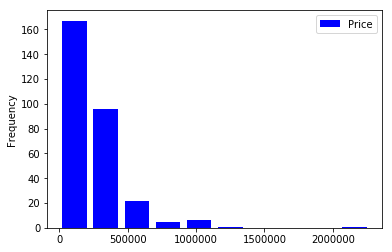

In [94]:
x.plot(kind='hist',rwidth=0.8,color='b')

<strong>Outside London</strong>

In [122]:
y=houses[houses.Price & houses['Town/City'] != 'LONDON']

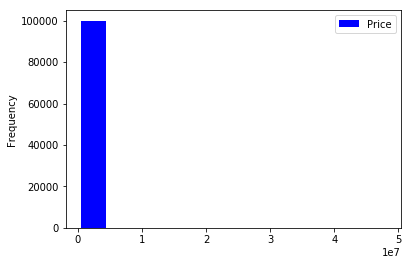

In [123]:
y.plot(kind='hist',rwidth=0.8,color='b')

In [143]:
houses['Date of Transfer'] = pd.to_datetime(houses['Date of Transfer'])
houses.head()

,Transction unique identifier,Price,Date of Transfer,Postcode,Property Type,old/new,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPDCategory Type,Record Status-monthly file only
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [144]:
houses['Date of Transfer'] = houses['Date of Transfer'].dt.year
houses['Date of Transfer'].value_counts().sort_index().head()

1995    3709
1996    4500
1997    4916
1998    4940
1999    5437
Name: Date of Transfer, dtype: int64

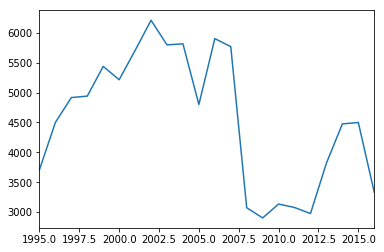

In [145]:
houses['Date of Transfer'].value_counts().sort_index().plot()

<h3>Part 2. Generating Random Numbers</h3>

<strong>Using random distribution</strong>

In [277]:
import random
def rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res 

<strong>At size=10</strong>

In [278]:
n=10
s=0
e=1
first_list = rand(s,e,n)
print(first_list)

[0, 1, 0, 1, 1, 1, 1, 0, 1, 1]


(array([3., 7., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

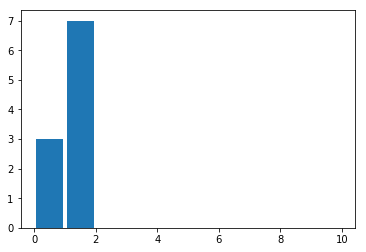

In [279]:
bins=[0,1,2,3,4,5,6,7,8,9,10]
plt.hist(first_list,bins,histtype='bar',rwidth=0.9)

   <strong>On decreasing the size of list</strong>

In [280]:
n=8
s=0
e=1
second_list = rand(s,e,n)
print(second_list)

[1, 1, 0, 1, 1, 0, 0, 0]


(array([4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

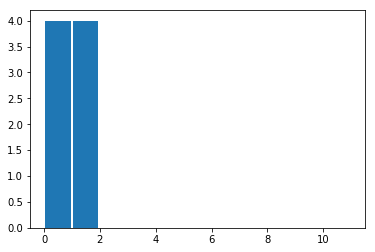

In [281]:
bins=[0,1,2,3,4,5,6,7,8,9,10,11]
plt.hist(second_list,bins,histtype='bar',rwidth=0.9)

<strong>On increasing the size of list</strong>

In [282]:
n=15
s=0
e=1
third_list = rand(s,e,n)
print(third_list)

[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


(array([10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

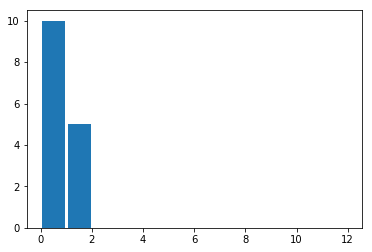

In [284]:
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(third_list,bins,histtype='bar',rwidth=0.9)

<strong>Shapes in the three cases</strong>

<h4>CASE 1.</h4>
<p>Left skewed</p>
<p>Unimodal</p>

<h4>CASE 2.</h4>
<p>symetric</p>
<p>uniform</p>

<h4>CASE 3.</h4>
<p>Unimodal</p>
<p>Right Skewed</p>

</p>Basically the shape of the histogram varies all the time, we the run the code </p>

<strong>Normal Distribution</strong>

<strong>when size is 100</strong>

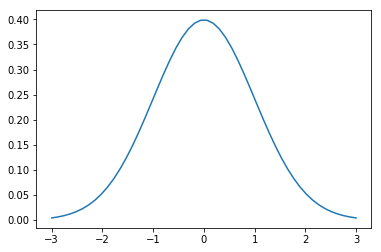

In [295]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


<strong>Decreasing the size</strong>

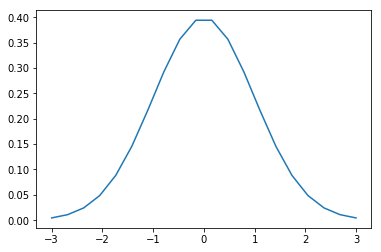

In [296]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 20)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


<strong>Increasing the size</strong>

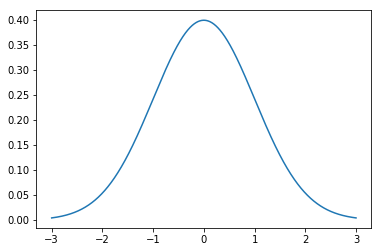

In [307]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 9000000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


<p>We find that on decreasing the size the edges are started devloping</p>
<p>On increasing the size the curveness of the curve increases</p>